In [1]:
# Import tensorflow
import tensorflow as tf

In [2]:
# Load the IMDB dataset
imdb = tf.keras.datasets.imdb

In [3]:
"""The argument num_words=10000 means you’ll only keep the top 10,000 most fre-
quently occurring words in the training data. Rare words will be discarded. This allows
you to work with vector data of manageable size.
The variables train_data and test_data are lists of reviews; each review is a list of
word indices (encoding a sequence of words). train_labels and test_labels are
lists of 0s and 1s, where 0 stands for negative and 1 stands for positive:"""

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

17465344/17464789 [==============================] - 1s 0us/step


In [4]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
train_labels[0]

1

In [6]:
"""You can’t feed lists of integers into a neural network. You have to turn your lists into
tensors.One-hot encode your lists to turn them into vectors of 0s and 1s. This would
mean, for instance, turning the sequence [3, 5] into a 10,000-dimensional vec-
tor that would be all 0s except for indices 3 and 5, which would be 1s. Then you
could use as the first layer in your network a Dense layer, capable of handling
floating-point vector data."""

# Encoding the integer sequences into a binary matrix
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


In [7]:
# Here’s what the samples look like now:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [8]:
"""There is more to this but for the time being, you’ll have to trust me with the following architecture choice:"""

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(16, activation='relu', input_shape=(10000,)),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')])

"""Two intermediate layers with 16 hidden units each. And a third layer that will output the scalar prediction 
regarding the sentiment of the current review"""

"""The intermediate layers will use relu as their activation function, and the final layer
will use a sigmoid activation so as to output a probability (a score between 0 and 1,
indicating how likely the sample is to have the target “1”: how likely the review is to be
positive). A relu (rectified linear unit) is a function meant to zero out negative values."""

'The intermediate layers will use relu as their activation function, and the final layer\nwill use a sigmoid activation so as to output a probability (a score between 0 and 1,\nindicating how likely the sample is to have the target “1”: how likely the review is to be\npositive). A relu (rectified linear unit) is a function meant to zero out negative values.'

In [9]:
# Compiling the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
# Setting aside a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train, partial_y_train, epochs=20,batch_size=512,validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
15000/15000 [==============================] - 2s 164us/sample - loss: 0.4966 - accuracy: 0.7892 - val_loss: 0.3636 - val_accuracy: 0.8754
Epoch 2/20
15000/15000 [==============================] - 2s 103us/sample - loss: 0.2850 - accuracy: 0.9109 - val_loss: 0.2945 - val_accuracy: 0.8895
Epoch 3/20
15000/15000 [==============================] - 1s 97us/sample - loss: 0.2125 - accuracy: 0.9287 - val_loss: 0.2793 - val_accuracy: 0.8889
Epoch 4/20
15000/15000 [==============================] - 1s 95us/sample - loss: 0.1682 - accuracy: 0.9461 - val_loss: 0.2959 - val_accuracy: 0.8793
Epoch 5/20
15000/15000 [==============================] - 1s 97us/sample - loss: 0.1348 - accuracy: 0.9585 - val_loss: 0.3318 - val_accuracy: 0.8685
Epoch 6/20
15000/15000 [==============================] - 2s 115us/sample - loss: 0.1148 - accuracy: 0.9637 -

In [11]:
# Plotting the training and validation loss
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


<Figure size 640x480 with 1 Axes>

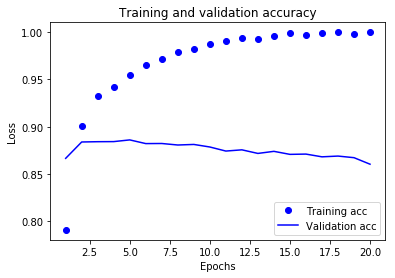

In [12]:
# Plotting the training and validation accuracy
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
# Retraining a model from scratch
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(16, activation='relu', input_shape=(10000,)),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')])

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=4,batch_size=512,validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 1s 84us/sample - loss: 0.5569 - accuracy: 0.7584 - val_loss: 0.4584 - val_accuracy: 0.8571
Epoch 2/4
15000/15000 [==============================] - 1s 46us/sample - loss: 0.3633 - accuracy: 0.8943 - val_loss: 0.3461 - val_accuracy: 0.8806
Epoch 3/4
15000/15000 [==============================] - 1s 46us/sample - loss: 0.2634 - accuracy: 0.9231 - val_loss: 0.3016 - val_accuracy: 0.8883
Epoch 4/4
25000/25000 [==============================] - 2s 64us/sample - loss: 0.2976 - accuracy: 0.8832


In [18]:
# Using a trained network to generate predictions on new data
model.predict(x_test)

array([[0.27379423],
       [0.9793424 ],
       [0.93266404],
       ...,
       [0.13444236],
       [0.17874026],
       [0.4376474 ]], dtype=float32)